In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [12]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
X = df.drop(columns=["math score"], axis = 1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [19]:
# transform data
numeric_features = X.select_dtypes(exclude = "object").columns
categorical_features = X.select_dtypes(include = "object").columns  

# transformers

numeric_transfomer = StandardScaler()
oh_transfomer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", oh_transfomer, categorical_features),
    ("StandardScaler", numeric_transfomer, numeric_features),
])

In [20]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape 

((800, 19), (200, 19))

In [25]:
# function to evaluate model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

    

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

model_list = []
r2_lsit = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # make predictions
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate train and data set 
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2815
- Mean Absolute Error: 4.2276
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5720
- Mean Absolute Error: 4.3948
- R2 Score: 0.8630


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6102
- Mean Absolute Error: 5.1990
- R2 Score: 0.8104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7021
- Mean Absolute Error: 5.3566
- R2 Score: 0.8018


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2818
- Mean Absolute Error: 4.2268
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5674
- Mean Absolute Error: 4.3880
- R2 Score: 0.8632


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8023
- Mean Absolute Error: 4.5990
- R2 Score: 0.8539
-----------------------

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.863213
0,Linear Regression,0.862990
7,CatBoosting Regressor,0.857797
5,Random Forest Regressor,0.857656
8,AdaBoost Regressor,0.822452
6,XGBRegressor,0.818506
1,Lasso,0.801773
3,K-Neighbors Regressor,0.790227
4,Decision Tree,0.728179


In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.30


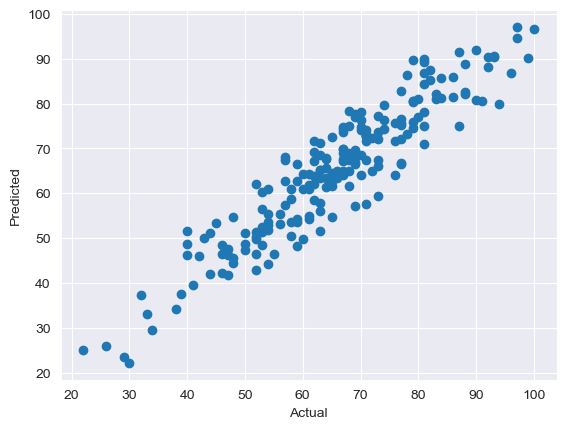

In [29]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

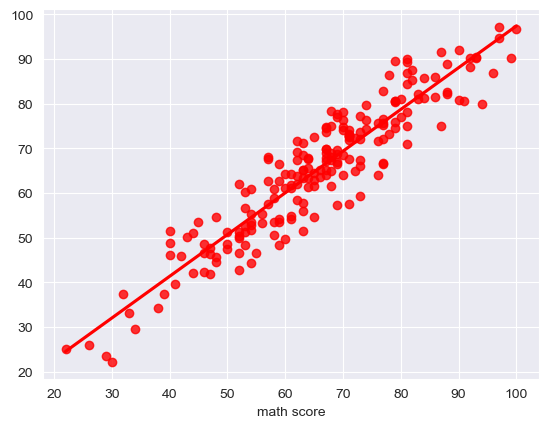

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
993,62,61.993516,0.006484
859,87,74.972337,12.027663
298,40,48.725338,-8.725338
553,77,66.527137,10.472863
672,69,69.574667,-0.574667
...,...,...,...
679,63,63.408063,-0.408063
722,74,76.236292,-2.236292
215,84,81.222810,2.777190
653,65,61.619288,3.380712
